Daten einlesen

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [14]:
df = pd.read_csv("../data/Library_Usage.csv", na_values="none")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


1. Wie viele Nutzer möchten per Mail informiert werden?

In [15]:
print(len(df[df['Notice Preference Definition'] == 'email']))

323937


2. Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?

In [16]:
print(df['Patron Type Definition'].unique())

['ADULT' 'SENIOR' 'WELCOME' 'TEACHER CARD' 'JUVENILE' 'YOUNG ADULT'
 'STAFF' 'DIGITAL ACCESS CARD' 'SPECIAL' 'AT USER ADULT' 'RETIRED STAFF'
 'VISITOR' 'BOOKS BY MAIL' 'AT USER SENIOR' 'FRIENDS FOR LIFE'
 'AT USER WELCOME' 'AT USER TEEN' 'AT USER JUVENILE']


Senioren: 

In [17]:
print(len(df[df['Patron Type Definition'] == 'SENIOR']))

41619


In [18]:
print(len(df[df['Patron Type Definition'] == 'AT USER SENIOR']))

66


In [19]:
SeniorAll = len(df[df['Patron Type Definition'] == 'SENIOR']) + len(df[df['Patron Type Definition'] == 'AT USER SENIOR'])
print(SeniorAll)

41685


Kinder (Jugendliche):

In [20]:
print(len(df[df['Patron Type Definition'] == 'JUVENILE']))

59208


In [21]:
print(len(df[df['Patron Type Definition'] == 'AT USER JUVENILE']))

47


In [22]:
KidsAll = len(df[df['Patron Type Definition'] == 'JUVENILE']) + len(df[df['Patron Type Definition'] == 'AT USER JUVENILE'])
print(KidsAll)

59255


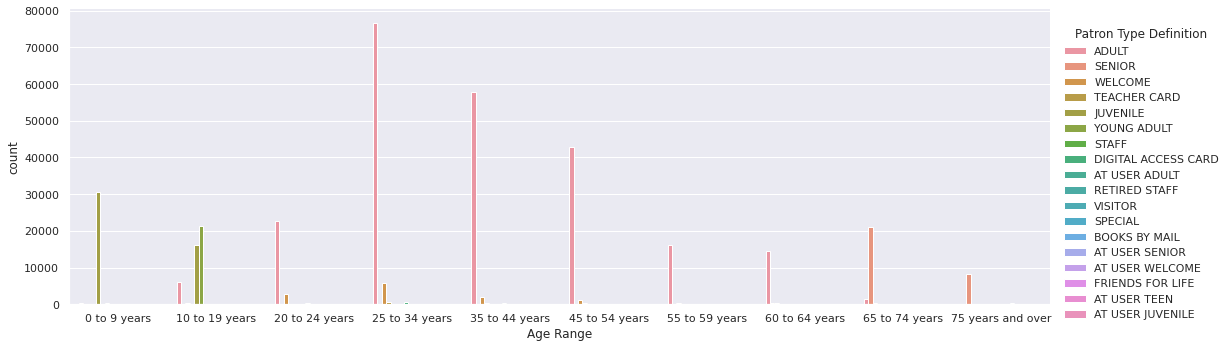

In [31]:
sns.catplot(x='Age Range', kind='count', hue='Patron Type Definition', data=notice_pref_def, 
            order=['0 to 9 years','10 to 19 years','20 to 24 years','25 to 34 years','35 to 44 years','45 to 54 years', '55 to 59 years', '60 to 64 years','65 to 74 years', '75 years and over'], aspect=3)

3. Wie alt sind diese Nutzer durchschnittlich?

In [23]:
NoticePreferenceDefinition=df.loc[
    (df['Notice Preference Definition'] == "email") | (df['Notice Preference Definition'] == "print")]
NoticePreferenceDefinition.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


welche Altersgruppen sind als "Senior" und "AT USER SENIOR" bzw. "Juvenile" und "AT USER JUVENILE" gekennzeichnet?

In [41]:
AllKidsAgeRange=df.loc[
    (df['Patron Type Definition'] == "JUVENILE") | 
    (df['Patron Type Definition'] == "AT USER JUVENILE")
]
print(AllKidsAgeRange["Age Range"])

283       10 to 19 years
287         0 to 9 years
289         0 to 9 years
291         0 to 9 years
292         0 to 9 years
               ...      
423429      0 to 9 years
423434      0 to 9 years
423437      0 to 9 years
423439      0 to 9 years
423447      0 to 9 years
Name: Age Range, Length: 59255, dtype: object


......to be continued

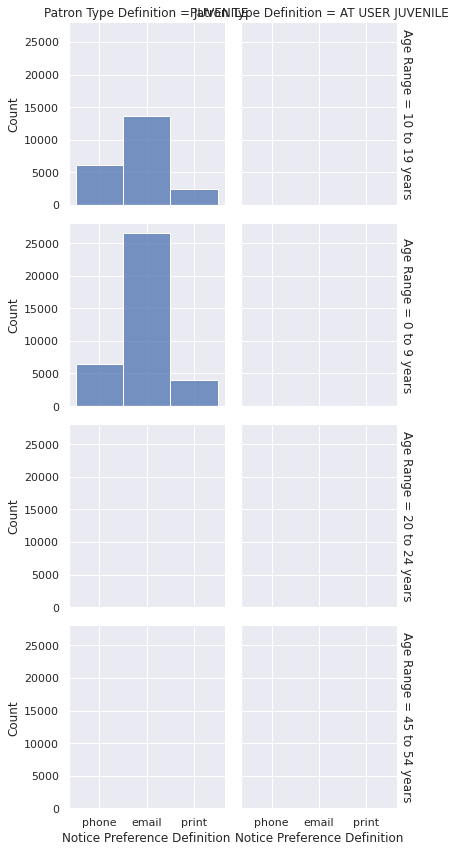

In [74]:
sns.set_theme(style="darkgrid")
df=AllKidsAgeRange
sns.displot(
    df, x="Notice Preference Definition", col="Patron Type Definition", row="Age Range",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)